In [13]:
import torch 
import torch.nn as nn 
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from tqdm import tqdm 

from PF_VAE import PlanarFlowVAE
from Loss import compute_loss

In [14]:
DEVICE="cpu"
dataset = MNIST(root="../../../coding/Dataset/", train=True, transform=ToTensor())
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)
inputs = torch.stack([dataset[i][0].flatten().to(DEVICE) for i in range(6)])

In [15]:
def show_images(model, inputs):
    with torch.no_grad():
        x_reconstructed = model(inputs, logdet=False)[0]
    
    image_size = (28, 28)
    inputs_reshaped = inputs.view(-1, 1, *image_size)
    x_reconstructed_reshaped = x_reconstructed.view(-1, 1, *image_size)
    grid = torch.cat([inputs_reshaped, x_reconstructed_reshaped], dim=0)
    grid_img = make_grid(grid, nrow=6)
    np_grid_image = grid_img.permute(1, 2, 0).cpu().numpy()

    plt.figure(figsize=(10, 10))
    plt.imshow(np_grid_image, cmap="gray")
    plt.axis('off')
    plt.show()

In [16]:
pf_vae = PlanarFlowVAE(in_dim=784, hiddens_dim=[512, 256], z_dim=20, act=torch.tanh, num_steps=20).to(DEVICE)
optimizer = optim.Adam(pf_vae.parameters(), lr=1e-3)
EPOCHS=10

100%|██████████| 469/469 [00:08<00:00, 54.16it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 1 ; loss is 21071.899291992188


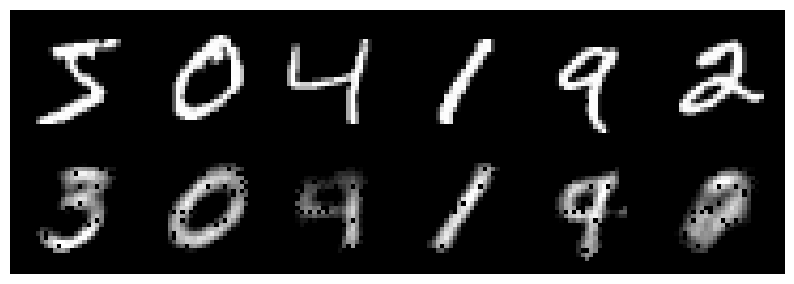

100%|██████████| 469/469 [00:08<00:00, 54.34it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 2 ; loss is 7777.376298904419


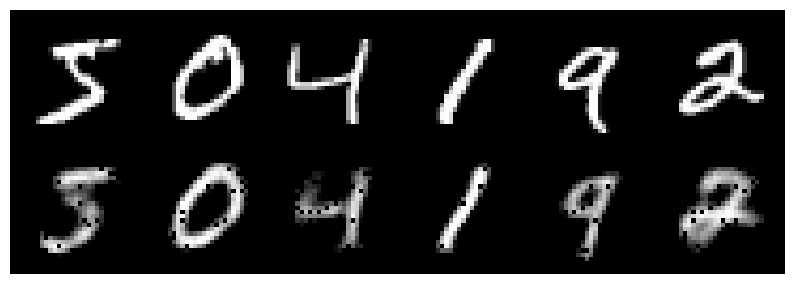

100%|██████████| 469/469 [00:08<00:00, 55.26it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 3 ; loss is 2089.7680768966675


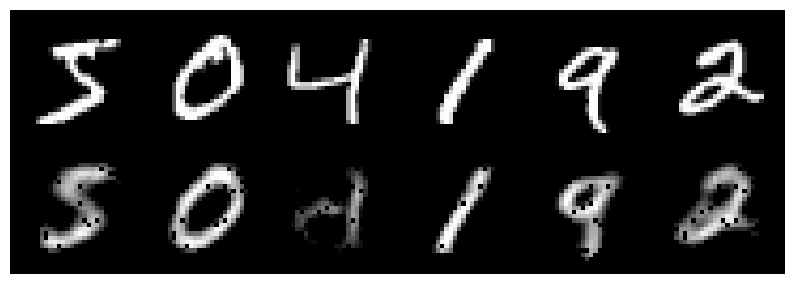

100%|██████████| 469/469 [00:08<00:00, 54.75it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 4 ; loss is -969.8170990943909


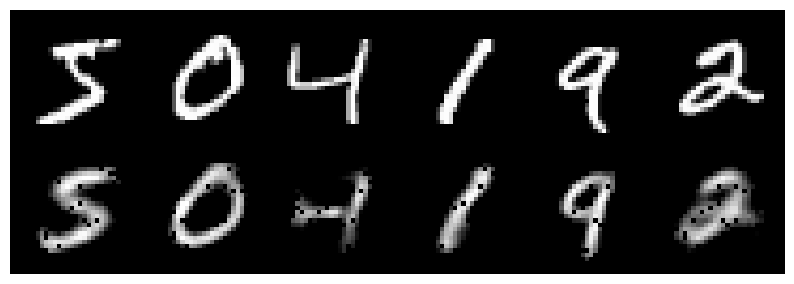

100%|██████████| 469/469 [00:08<00:00, 54.99it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 5 ; loss is -3003.166268348694


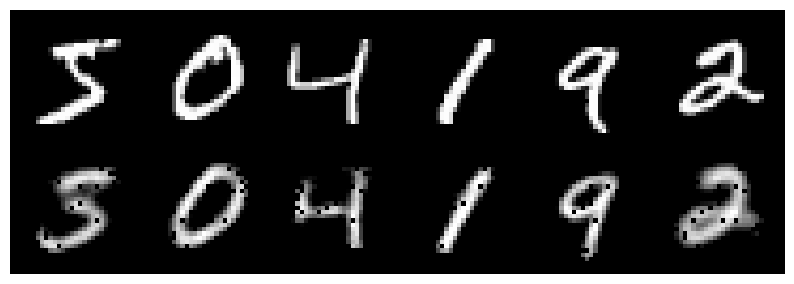

100%|██████████| 469/469 [00:08<00:00, 54.78it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 6 ; loss is -4646.885136604309


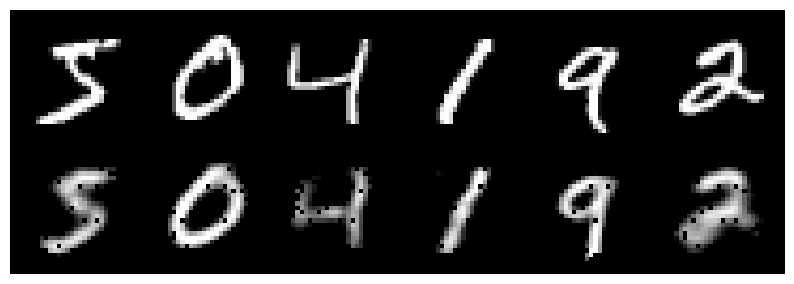

100%|██████████| 469/469 [00:08<00:00, 54.63it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 7 ; loss is -5932.493443489075


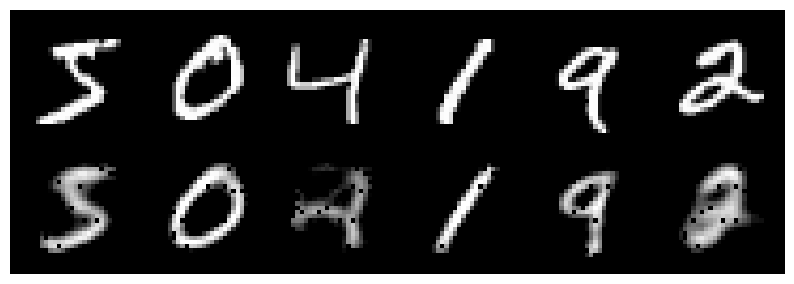

100%|██████████| 469/469 [00:08<00:00, 54.23it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 8 ; loss is -6852.636889457703


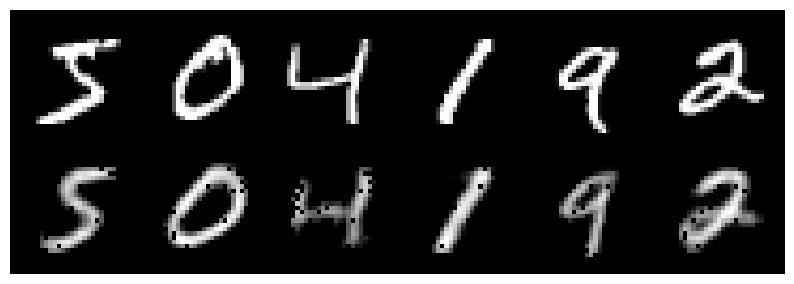

100%|██████████| 469/469 [00:08<00:00, 55.00it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 9 ; loss is -7778.0852880477905


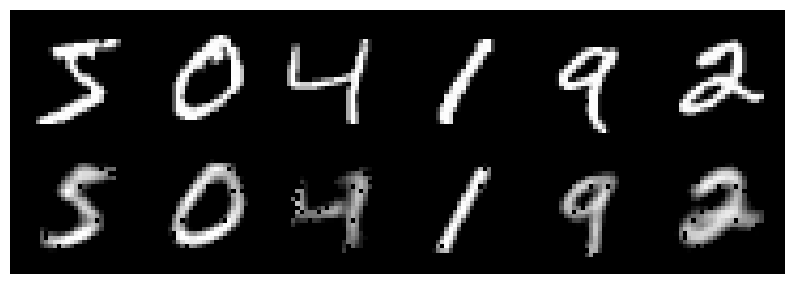

100%|██████████| 469/469 [00:08<00:00, 54.94it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For epoch 10 ; loss is -8447.590087890625


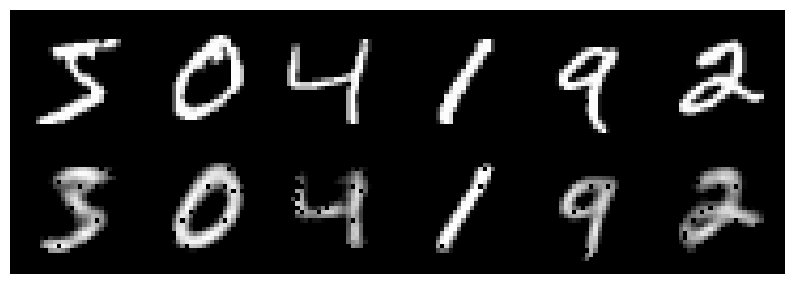

In [17]:
for epoch in range(EPOCHS):
    epoch_loss=0
    for x_in, targets in tqdm(dataloader):
        x_in = x_in.flatten(start_dim=1).to(DEVICE)
        x_out, sum_logdet, mu, sigma = pf_vae(x_in, logdet=True)
        loss = compute_loss(x_in, x_out, sum_logdet, mu, sigma)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss+=loss.item()
    print(f"For epoch {epoch+1} ; loss is {epoch_loss}")
    show_images(pf_vae, inputs)